Dataset shape: (9179, 28)
   Database Fundamentals  Computer Architecture  \
0                      6                      4   
1                      6                      5   
2                      6                      1   
3                      6                      0   
4                      6                      3   

   Distributed Computing Systems  Cyber Security  Networking  \
0                              4               4           4   
1                              4               4           4   
2                              4               4           4   
3                              4               4           4   
4                              4               4           4   

   Software Development  Programming Skills  Project Management  \
0                     4                   4                   4   
1                     4                   4                   4   
2                     4                   4                   4   
3             

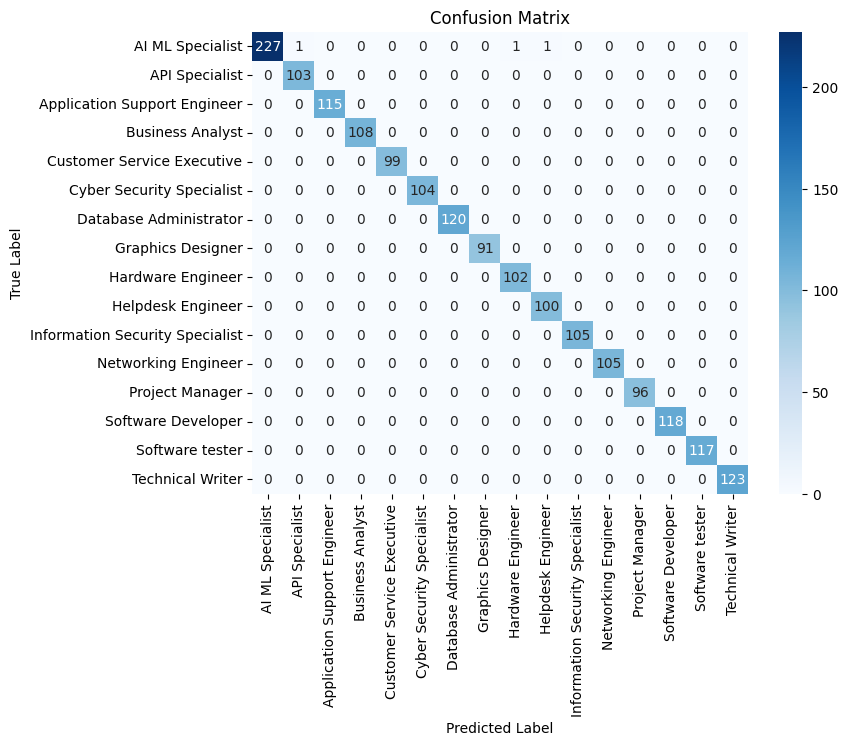

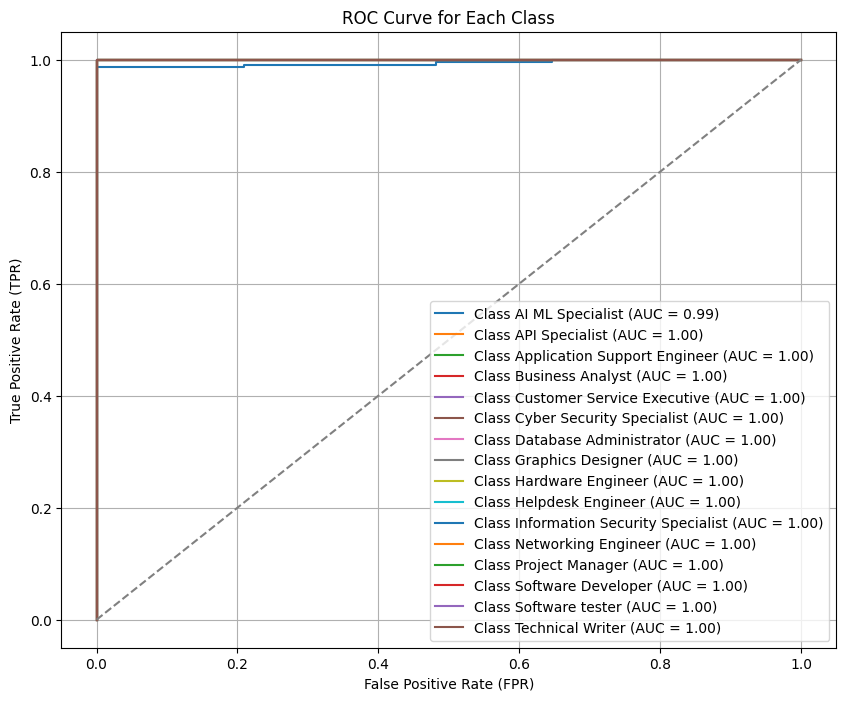

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model trained, ROC curve generated, and files downloaded.


In [ ]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# STEP 2: Load the Dataset
file_path = '/content/drive/MyDrive/Intership task/CareerMap- Mapping Tech Roles With Personality & Skills.csv'
df = pd.read_csv(file_path)

# STEP 3: Explore Data (optional)
print("Dataset shape:", df.shape)
print(df.head())

# STEP 4: Encode Target Labels
label_encoder = LabelEncoder()
df['Role'] = label_encoder.fit_transform(df['Role'])

# STEP 5: Split Features and Labels
X = df.drop('Role', axis=1)
y = df['Role']

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Feature Scaling (Optional but helps with Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 8: Train a Logistic Regression Classifier (One-vs-Rest for multi-class support)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
model.fit(X_train, y_train)

# STEP 9: Make Predictions
y_pred = model.predict(X_test)

# STEP 10: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# STEP 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# STEP 12: ROC Curve (TPR vs FPR) for Binary or Multi-Class
n_classes = len(np.unique(y))
y_test_binarized = label_binarize(y_test, classes=range(n_classes))
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# STEP 13: Save Model and Files
joblib.dump(model, 'career_model.pkl')
joblib.dump(label_encoder, 'role_encoder.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

files.download('career_model.pkl')
files.download('role_encoder.pkl')
files.download('feature_columns.pkl')

print("✅ Model trained, ROC curve generated, and files downloaded.")


Model and related files loaded successfully.


Model and related files loaded successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now that the model is loaded, you can test it with new data. The following cell will guide you through providing input for a new prediction.

In [1]:
374























0.9329

# STEP 14: Test the model with user-based input

# Create a dictionary to store user input for each feature
user_input_data = {}

# Iterate through the loaded feature columns and prompt the user for input
print("Please provide input for the following features:")
for feature in loaded_feature_columns:
    # You might want to add input validation here based on the expected data type and range
    try:
        value = float(input(f"Enter value for '{feature}': "))
        user_input_data[feature] = value
    except ValueError:
        print("Invalid input. Please enter a numeric value.")
        # You could handle this error more robustly, e.g., by re-prompting

# Convert user input to a pandas DataFrame
user_input_df = pd.DataFrame([user_input_data])

# Ensure the column order matches the training data
user_input_df = user_input_df[loaded_feature_columns]

# Scale the user input using the same scaler fitted on the training data
# Make sure you have the scaler object available from the training phase, or save/load it
# For now, assuming 'scaler' is available from the previous execution.
# If not, you would need to save and load the scaler as well.
try:
    user_input_scaled = scaler.transform(user_input_df)
except NameError:
    print("Scaler not found. Please ensure the scaler from the training phase is available.")
    # Handle this error appropriately

# Make a prediction using the loaded model
if 'user_input_scaled' in locals():
    predicted_role_encoded = loaded_model.predict(user_input_scaled)

    # Inverse transform the predicted label to get the original role name
    predicted_role = loaded_label_encoder.inverse_transform(predicted_role_encoded)

    print("\nPredicted Role:", predicted_role[0])

Please provide input for the following features:


NameError: name 'loaded_feature_columns' is not defined